# Goals of the Case Study

There are quite a few goals for this case study:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

# Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import StandardScaler

In [5]:
#importing dataset

leads_df=pd.read_csv("Leads.csv")

In [6]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
leads_df.shape

(9240, 37)

In [10]:
#check for duplicates
sum(leads_df.duplicated(subset = 'Prospect ID')) == 0

True

In [11]:
#check for duplicates
sum(leads_df.duplicated(subset = 'Lead Number')) == 0

True

# Exploratory Data Analysis

# Data Cleaning

Identifying Missing Values

In [12]:
leads_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [13]:
#Converting 'Select' values to NaN.

leads_df = leads_df.replace('Select', np.nan)

In [15]:
#checking null values in each rows

leads_df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [16]:
#checking percentage of null values in each column

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

Dropping Columns with Missing Values >=35%

In [17]:
#Drop all the columns with more than 45% missing values
cols=leads_df.columns

for i in cols:
    if((100*(leads_df[i].isnull().sum()/len(leads_df.index))) >= 35):
        leads_df.drop(i, 1, inplace = True)

In [18]:
#checking percentage of null values in each column after dropping columns with more than 45% missing values

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

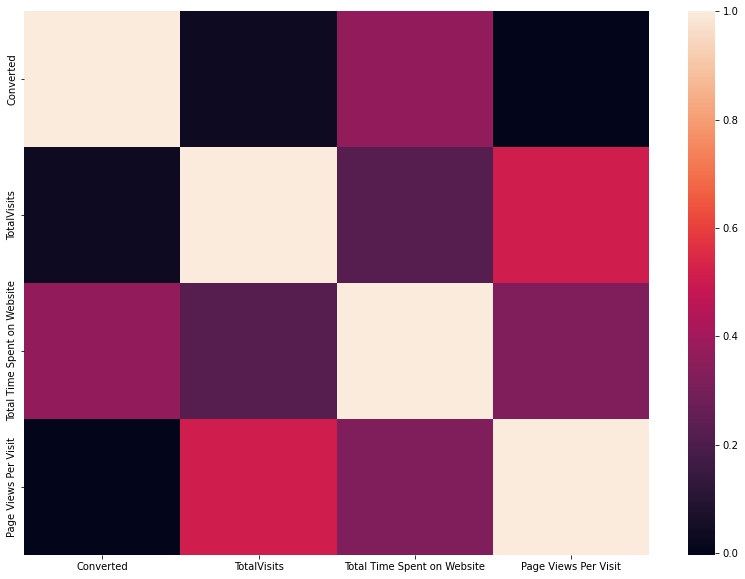

In [22]:
# visualizing correlation by heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(leads_df.corr())
plt.show()

# Categorical Attributes Analysis:

Imbalanced Variables

In [23]:
leads_df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

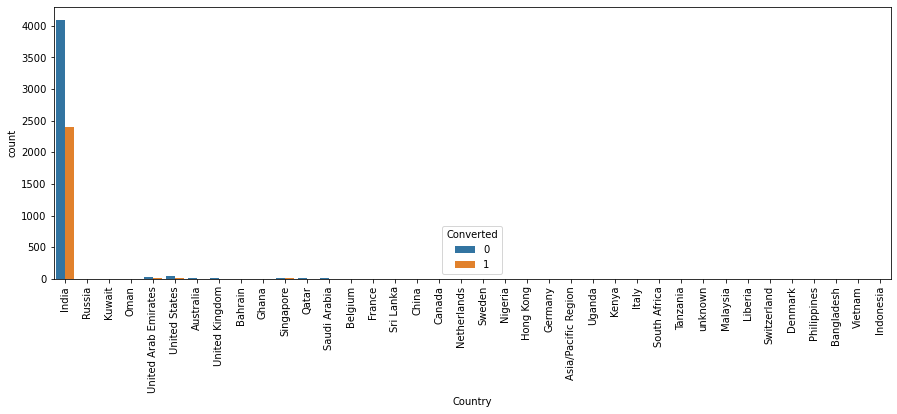

In [26]:
plt.figure(figsize=(15,5))
s1=sns.countplot(leads_df.Country, hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Inference
As we can see that most of the data consists of value 'India', no inference can be drawn from this parameter.Hence, we can drop this column

In [29]:
cols_to_drop=['Country']


In [35]:
#checking value counts of "City" column

leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

there is no information provided regarding occupation, so we can replace missing values with new category 'Not provided'


In [36]:
#Creating new category 'Not provided'

leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan, 'Not provided')

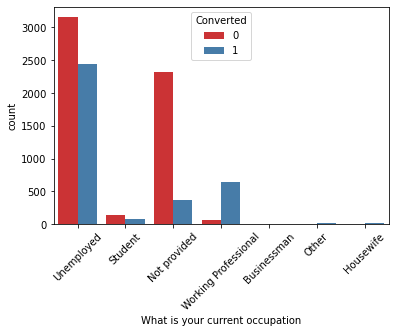

In [49]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x='What is your current occupation', hue='Converted' , data = leads_df , palette = 'Set1')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

Maximum leads generated are unemployed and their conversion rate is more than 50%.
Conversion rate of working professionals is very high.

In [38]:
#checking value counts of 'What matters most to you in choosing a course'

leads_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Clearly seen that missing values in the this column can be imputed by 'Better Career Prospects'

In [40]:
leads_df['What matters most to you in choosing a course'] = leads_df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

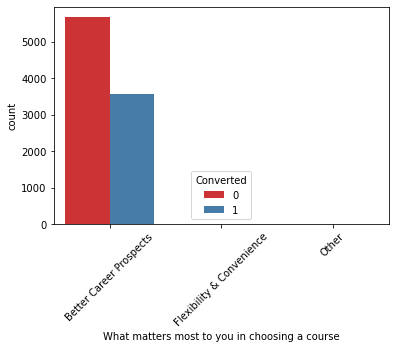

In [48]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x= 'What matters most to you in choosing a course', hue='Converted' , data = leads_df , palette = 'Set1')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

This column spread of variance is very low , hence it can be dropped.

In [50]:
# Append 'What matters most to you in choosing a course'to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')

#checking updated list for columns to be dropped
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [51]:

#checking value counts of Last Activity
leads_df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

Missing values can be imputed with mode value "Email Opened"

In [52]:
  #replacing Nan Values with mode value "Email Opened"

leads_df['Last Activity'] = leads_df['Last Activity'].replace(np.nan,'Email Opened')

In [53]:
#combining low frequency values
leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                       'Had a Phone Conversation', 
                                                       'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

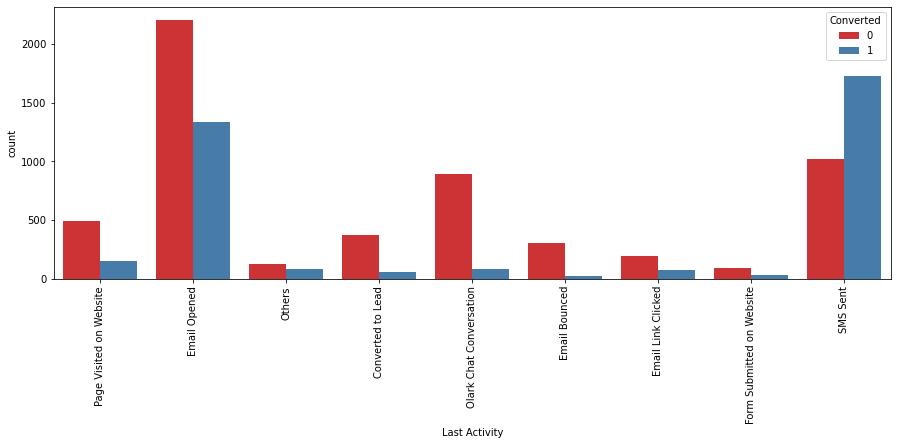

In [55]:
#visualizing count of Last Activity Variable 

plt.figure(figsize=(15,5))
s1=sns.countplot(x='Last Activity', hue='Converted' , data = leads_df , palette = 'Set1')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Maximum leads are generated having last activity as Email opened but conversion rate is not too good.
SMS sent as last acitivity has high conversion rate.

In [56]:
# Append 'Last Activity' to the cols_to_drop List it is a X-education's sales team generated data
cols_to_drop.append('Last Activity')

#checking updated list for columns to be dropped
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Last Activity']

In [57]:
#Check the Null Values in All Columns after imputation:
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                          26.63
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [58]:
# Remaining missing values percentage is less than 2%, we can drop those rows without affecting the data
leads_df = leads_df.dropna()

In [59]:
leads_df.shape

(6778, 25)

In [60]:
#Checking percentage of Null Values in All Columns:
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

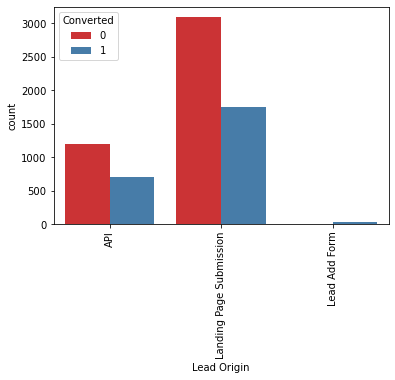

In [62]:
s1=sns.countplot(x='Lead Origin', hue='Converted' , data = leads_df , palette = 'Set1')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

# Do Not Email & Do Not Call

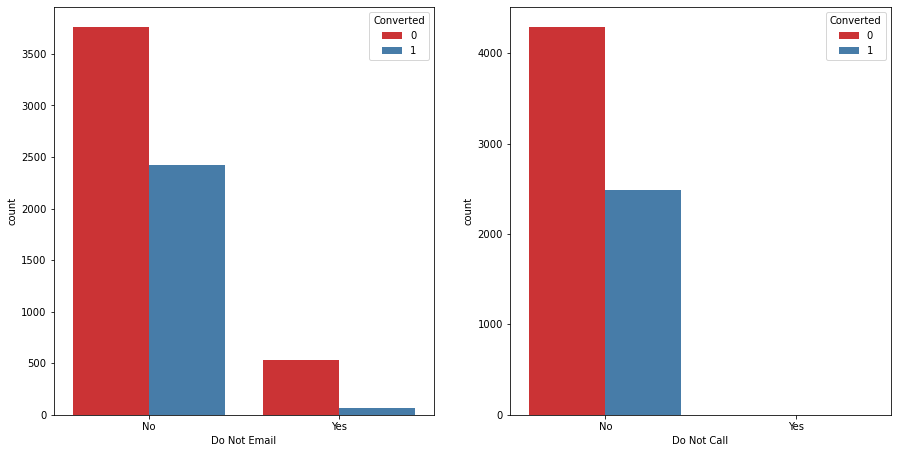

In [64]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads_df, ax = axs[0],palette = 'Set1')
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads_df, ax = axs[1],palette = 'Set1')
plt.show()

We Can append the Do Not Call Column to the list of Columns to be Dropped data is higjly skewed

In [65]:
# Append 'Do Not Call' to the cols_to_drop List
cols_to_drop.append('Do Not Call')

#checking updated list for columns to be dropped
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call']

Last Notable Activity

In [66]:
#checking value counts of last Notable Activity
leads_df['Last Notable Activity'].value_counts()

Modified                        2331
Email Opened                    2212
SMS Sent                        1642
Page Visited on Website          286
Email Link Clicked               106
Olark Chat Conversation           68
Email Bounced                     48
Unsubscribed                      40
Unreachable                       26
Had a Phone Conversation          14
Approached upfront                 1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Email Marked Spam                  1
Name: Last Notable Activity, dtype: int64

In [67]:
#clubbing lower frequency values

leads_df['Last Notable Activity'] = leads_df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

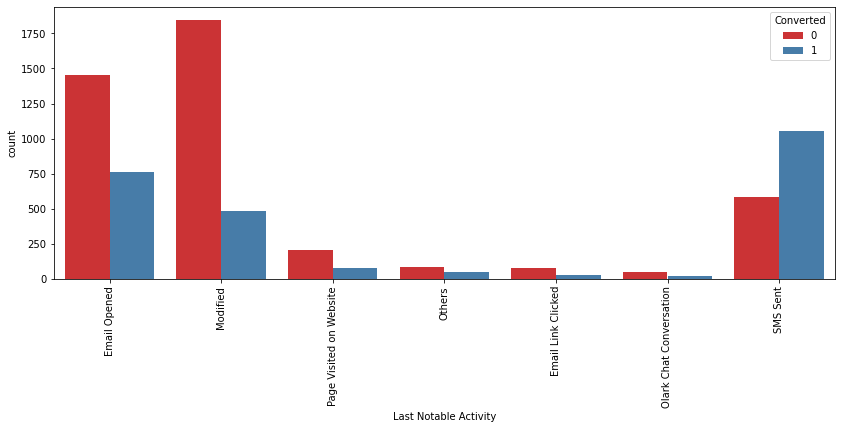

In [69]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_df , palette = 'Set1')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

Inference

Maximum leads are generated having last activity as Email opened but conversion rate is not too good.
SMS sent as last acitivity has high conversion rate.

In [70]:
# Append 'Last Notable Activity'to the cols_to_drop List as this is a sales team generated data
cols_to_drop.append('Last Notable Activity')

In [71]:
# checking final list of columns to be dropped
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call',
 'Last Notable Activity']

In [72]:
#dropping columns
leads = leads_df.drop(cols_to_drop,1)

#checking info of dataset for remaining columns
leads.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6778 entries, 1 to 9239
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               6778 non-null   object 
 1   Lead Source                               6778 non-null   object 
 2   Do Not Email                              6778 non-null   object 
 3   Converted                                 6778 non-null   int64  
 4   TotalVisits                               6778 non-null   float64
 5   Total Time Spent on Website               6778 non-null   int64  
 6   Page Views Per Visit                      6778 non-null   float64
 7   What is your current occupation           6778 non-null   object 
 8   Search                                    6778 non-null   object 
 9   Magazine                                  6778 non-null   object 
 10  Newspaper Article                   

In [73]:
#checking dataset
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
1,API,Organic Search,No,0,5.0,674,2.5,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Student,No,No,No,No,No,No,No,No,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No
6,Landing Page Submission,Google,No,1,2.0,1640,2.0,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No


Numerical Attributes Analysis:
Converted

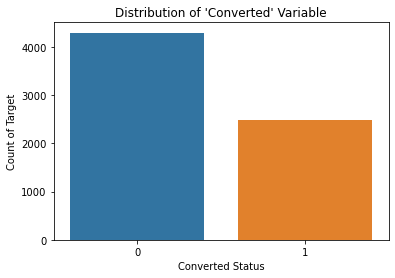

In [74]:
#Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
#Visualizing Distribution of 'Converted' Variable
sns.countplot(leads.Converted)
plt.xlabel("Converted Status")
plt.ylabel("Count of Target")
plt.title("Distribution of 'Converted' Variable")
plt.show()

In [75]:
# Finding out conversion rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

36.64797875479493

Currently, lead Conversion rate is 38% only

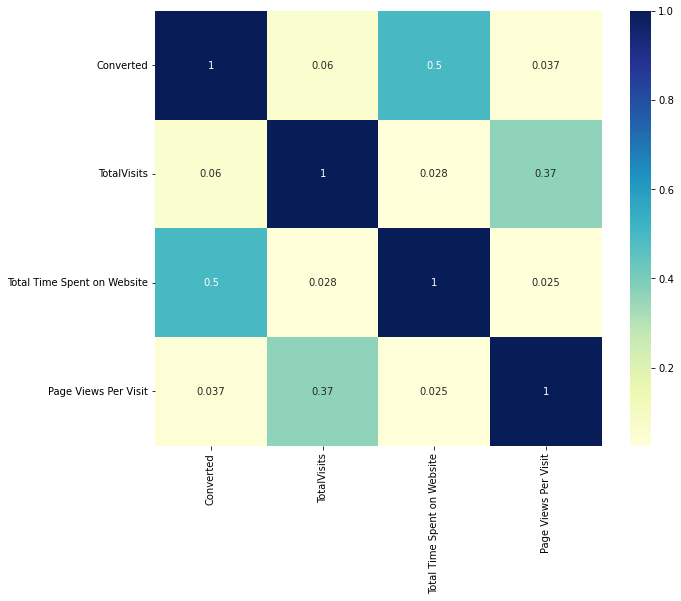

In [77]:
#Checking correlations of numeric values using heatmap

# Size of the figure
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

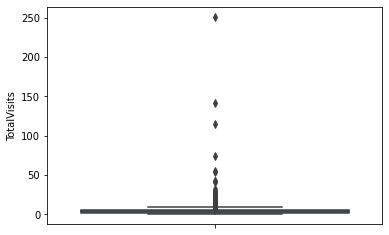

In [78]:
#visualizing spread of variable Total Visits

sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [79]:

#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6778.000000
mean        4.554293
std         5.138434
min         0.000000
5%          1.000000
25%         2.000000
50%         4.000000
75%         5.000000
90%         8.000000
95%        11.000000
99%        18.230000
max       251.000000
Name: TotalVisits, dtype: float64

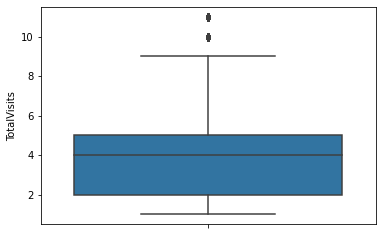

In [80]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['TotalVisits'])
plt.show()

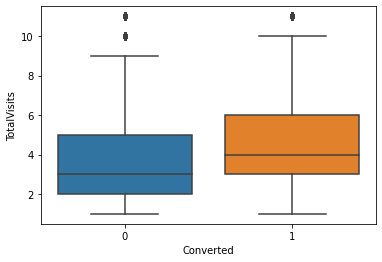

In [81]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

In [82]:
#checking percentiles for "Total Time Spent on Website"

leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6778.000000
mean      631.990558
std       542.103039
min         0.000000
5%         33.000000
25%       171.000000
50%       397.000000
75%      1105.750000
90%      1452.000000
95%      1606.000000
99%      1863.690000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

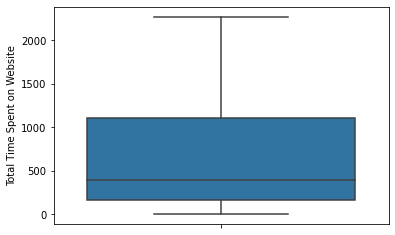

In [83]:
#visualizing spread of variable 'Total Time Spent on Website'
sns.boxplot(y = leads['Total Time Spent on Website'])
plt.show()

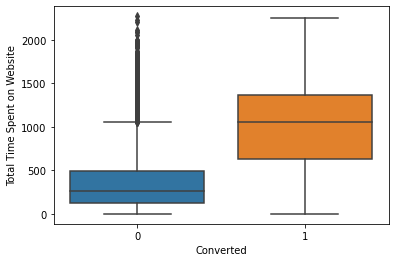

In [84]:
# Visualizing 'Total Time Spent on Website' w.r.t Target Variable 'converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.show()


As can be seen, leads spending more time on website are more likely to convert , thus website should be made more enagaging to increase conversion rate

In [85]:
leads['Page Views Per Visit'].describe()

count    6778.000000
mean        3.126363
std         1.959030
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

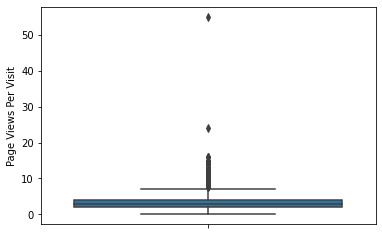

In [86]:
#visualizing spread of variable 'Page Views Per Visit'
sns.boxplot(y =leads['Page Views Per Visit'])
plt.show()

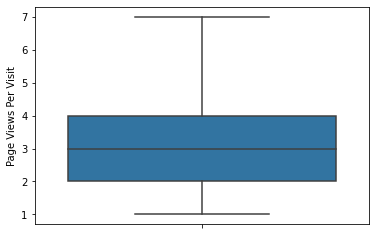

In [87]:
#Outlier Treatment: capping the outliers to 95% value for analysis
percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

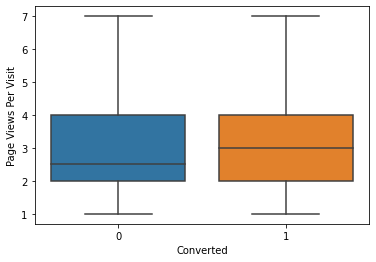

In [88]:
#visualizing 'Page Views Per Visit' w.r.t Target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.show()

Median for converted and not converted leads is almost same.
Nothing conclusive can be said on the basis of Page Views Per Visit.

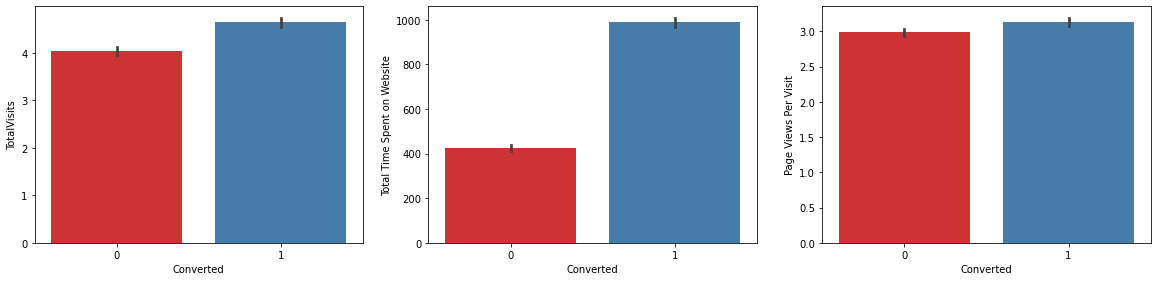

In [89]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set1', data = leads)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set1', data = leads)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set1', data = leads)
plt.show()

all data labels are in good shape , we will proceed to our next step which is Data Preparation

Converting some binary variables (Yes/No) to 0/1

In [91]:
# List of variables to map

varlist =  ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [92]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student,No,No,No,No,No,No,No,No,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No
6,Landing Page Submission,Google,0,1,2.0,1640,2.0,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No


In [93]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6778 entries, 1 to 9239
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               6778 non-null   object 
 1   Lead Source                               6778 non-null   object 
 2   Do Not Email                              6778 non-null   int64  
 3   Converted                                 6778 non-null   int64  
 4   TotalVisits                               6778 non-null   float64
 5   Total Time Spent on Website               6778 non-null   int64  
 6   Page Views Per Visit                      6778 non-null   float64
 7   What is your current occupation           6778 non-null   object 
 8   Search                                    6778 non-null   object 
 9   Magazine                                  6778 non-null   object 
 10  Newspaper Article                   

# Dummy Variable Creation:

In [94]:
#getting a list of categorical columns foy creating dummy

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [95]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student,No,No,No,No,No,No,No,No,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No
6,Landing Page Submission,Google,0,1,2.0,1640,2.0,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No


In [96]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6778 entries, 1 to 9239
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               6778 non-null   object 
 1   Lead Source                               6778 non-null   object 
 2   Do Not Email                              6778 non-null   int64  
 3   Converted                                 6778 non-null   int64  
 4   TotalVisits                               6778 non-null   float64
 5   Total Time Spent on Website               6778 non-null   int64  
 6   Page Views Per Visit                      6778 non-null   float64
 7   What is your current occupation           6778 non-null   object 
 8   Search                                    6778 non-null   object 
 9   Magazine                                  6778 non-null   object 
 10  Newspaper Article                   

In [99]:
#getting a list of categorical columns foy creating dummy

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [100]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin']], drop_first=True)
leads = pd.concat([leads,dummy],1)


In [ ]:
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [102]:
dummy = pd.get_dummies(leads['What is your current occupation'], prefix  = 'What is your current occupation')
dummy = dummy.drop(['What is your current occupation_Not provided'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [103]:
#dropping the original columns after dummy variable creation

leads.drop(cat_cols,1,inplace = True)

In [104]:
#checking dataset after dummy variable creation
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,0,1,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,1,0,1,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,1,0,1,0,0,0,0,0,1,0
6,0,1,2.0,1640,2.0,1,0,1,0,0,0,0,0,1,0


Test-Train Split

#importing library for splitting dataset
from sklearn.model_selection import train_test_split

In [118]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = leads['Converted']

y.head()

X=leads.drop('Converted', axis=1)

In [119]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [120]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4744 entries, 2746 to 7703
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          4744 non-null   int64  
 1   TotalVisits                                           4744 non-null   float64
 2   Total Time Spent on Website                           4744 non-null   int64  
 3   Page Views Per Visit                                  4744 non-null   float64
 4   Lead Origin_Landing Page Submission                   4744 non-null   uint8  
 5   Lead Origin_Lead Add Form                             4744 non-null   uint8  
 6   Lead Origin_Landing Page Submission                   4744 non-null   uint8  
 7   Lead Origin_Lead Add Form                             4744 non-null   uint8  
 8   What is your current occupation_Businessman           4

In [121]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
2746,-0.313286,-0.485229,0.186744,-0.025207,1,0,1,0,0,1,0,0,0,0
6543,-0.313286,-0.876846,-0.854513,-0.659092,1,0,1,0,0,0,0,0,1,0
7458,-0.313286,-0.485229,1.624932,-0.025207,1,0,1,0,0,0,0,0,0,0
7448,-0.313286,0.298006,0.554137,1.242563,1,0,1,0,0,0,0,0,0,1
6134,-0.313286,-0.485229,0.559676,-0.025207,1,0,1,0,0,0,0,0,1,0


Model Building using Stats Model & RFE:

In [122]:
import statsmodels.api as sm

In [125]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [128]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg)          


In [138]:
rfe = rfe.fit(X_train, y_train)

In [139]:
rfe.support_

array([False, False,  True, False, False,  True, False,  True, False,
        True,  True, False,  True,  True])

In [140]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 4),
 ('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('What is your current occupation_Businessman', False, 3),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', False, 2),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1)]

In [141]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [142]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission',
       'Lead Origin_Landing Page Submission',
       'What is your current occupation_Businessman',
       'What is your current occupation_Student'],
      dtype='object')

Model 1

In [143]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4744
Model:                            GLM   Df Residuals:                     4737
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2230.9
Date:                Sun, 05 Mar 2023   Deviance:                       4461.7
Time:                        22:30:24   Pearson chi2:                 4.64e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3092
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6644      0.081    -20.560      0.000      -1.823      -1.506
Total Time Spent on Website                              1.1372      0.039     29.016      0.000       1.060       1.214
Lead Origin_Lead Add Form                                5.8721   3903.429      0.002      0.999   -7644.708    7656.453
Lead Origin_Lead Add Form                                5.8721   3903.429      0.002      0.999   -7644.708    7656.453
Lead Origin_Lead Add Form                                5.8721   3903.429      0.002      0.999   -7644.708    7656.453
Lead Origin_Lead Add Form                                5.8721   3903.429      0.002      0.999   -7644.708    7656.453
What is your current occupation_Housewife               24.8220   2.61e+04      0.001      0.999    -5.1e+04    5.11e+04
What is your current occupation_Other                    1.6455      0.693      2.376      0.017       0.288       3.003
What is your current occupation_Unemployed               1.0753      0.091     11.797      0.000       0.897       1.254
What is your current occupation_Working Professional     3.6654      0.210     17.467      0.000       3.254       4.077
========================================================================================================================
"""

In [144]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Housewife',1)

Model 2

In [145]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4744
Model:                            GLM   Df Residuals:                     4738
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2239.8
Date:                Sun, 05 Mar 2023   Deviance:                       4479.6
Time:                        22:31:35   Pearson chi2:                 4.65e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3066
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6374      0.080    -20.428      0.000      -1.794      -1.480
Total Time Spent on Website                              1.1366      0.039     29.061      0.000       1.060       1.213
Lead Origin_Lead Add Form                                5.9902   3806.227      0.002      0.999   -7454.078    7466.059
Lead Origin_Lead Add Form                                5.9902   3806.227      0.002      0.999   -7454.078    7466.059
Lead Origin_Lead Add Form                                5.9902   3806.227      0.002      0.999   -7454.078    7466.059
Lead Origin_Lead Add Form                                5.9902   3806.227      0.002      0.999   -7454.078    7466.059
What is your current occupation_Other                    1.6187      0.692      2.338      0.019       0.262       2.976
What is your current occupation_Unemployed               1.0483      0.090     11.589      0.000       0.871       1.226
What is your current occupation_Working Professional     3.6382      0.210     17.365      0.000       3.228       4.049
========================================================================================================================
"""

In [146]:
#dropping column with high p-value

col = col.drop('Lead Origin_Lead Add Form',1)

Model 3

In [147]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4744
Model:                            GLM   Df Residuals:                     4739
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2253.3
Date:                Sun, 05 Mar 2023   Deviance:                       4506.6
Time:                        22:33:07   Pearson chi2:                 4.68e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3027
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6305      0.080    -20.391      0.000      -1.787      -1.474
Total Time Spent on Website                              1.1336      0.039     29.076      0.000       1.057       1.210
What is your current occupation_Other                    1.6132      0.692      2.331      0.020       0.257       2.970
What is your current occupation_Unemployed               1.0526      0.090     11.666      0.000       0.876       1.229
What is your current occupation_Working Professional     3.6534      0.209     17.473      0.000       3.244       4.063
========================================================================================================================
"""

In [148]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Other',1)

Since the Model 3 seems to be stable with significant p-values, we shall go ahead with this model for further analysis

Calculating VIF

In [150]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,1.02
2,What is your current occupation_Working Profes...,1.02
1,What is your current occupation_Unemployed,1.00


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

Predicting a Train model

In [152]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2746    0.194849
6543    0.175575
7458    0.552685
7448    0.934077
6134    0.514123
418     0.154818
6439    0.177400
2837    0.772724
5336    0.083466
8261    0.952789
dtype: float64

In [153]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19484925, 0.17557543, 0.55268519, 0.93407746, 0.51412258,
       0.15481797, 0.17740046, 0.77272386, 0.0834657 , 0.95278917])

In [154]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.194849,2746
1,0,0.175575,6543
2,1,0.552685,7458
3,1,0.934077,7448
4,1,0.514123,6134


In [155]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.194849,2746,0
1,0,0.175575,6543,0
2,1,0.552685,7458,1
3,1,0.934077,7448,1
4,1,0.514123,6134,1


Metrics -Accuracy, Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [156]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2611  410]
 [ 632 1091]]


In [157]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.78035413153457


In [158]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [159]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6331979106210098

In [160]:
# Let us calculate specificity
TN / float(TN+FP)

0.8642833498841443

In [161]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.13571665011585568


In [162]:
# positive predictive value 
print (TP / float(TP+FP))

0.7268487674883412


In [163]:

# Negative predictive value
print (TN / float(TN+ FN))

0.8051187172371261


# PLOTTING ROC CURVE

In [164]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [166]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob,drop_intermediate = False )

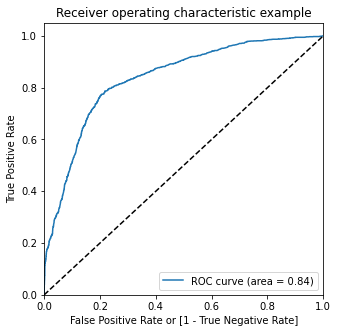

In [167]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [168]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.194849,2746,0,1,1,0,0,0,0,0,0,0,0
1,0,0.175575,6543,0,1,1,0,0,0,0,0,0,0,0
2,1,0.552685,7458,1,1,1,1,1,1,1,0,0,0,0
3,1,0.934077,7448,1,1,1,1,1,1,1,1,1,1,1
4,1,0.514123,6134,1,1,1,1,1,1,1,0,0,0,0


In [169]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.363196  1.000000  0.000000
0.1   0.1  0.506745  0.981428  0.236015
0.2   0.2  0.700464  0.874637  0.601125
0.3   0.3  0.782884  0.786999  0.780536
0.4   0.4  0.787521  0.717353  0.827541
0.5   0.5  0.780354  0.633198  0.864283
0.6   0.6  0.758642  0.504353  0.903674
0.7   0.7  0.730396  0.369704  0.936114
0.8   0.8  0.703415  0.233314  0.971533
0.9   0.9  0.682336  0.134068  0.995035


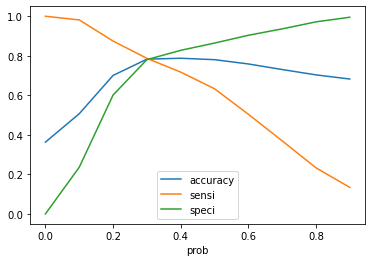

In [170]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [171]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.194849,2746,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.175575,6543,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.552685,7458,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.934077,7448,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.514123,6134,1,1,1,1,1,1,1,0,0,0,0,1


In [220]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.194849,2746,0,19
1,0,0.175575,6543,0,18
2,1,0.552685,7458,1,55
3,1,0.934077,7448,1,93
4,1,0.514123,6134,1,51


In [221]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7828836424957841

In [222]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2358,  663],
       [ 367, 1356]], dtype=int64)

In [223]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [224]:
TP / float(TP+FN)

0.7869994196169472

In [225]:
# Let us calculate specificity
TN / float(TN+FP)

0.7805362462760675

Observation:
    
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.84, which is very good. We have the following values for the Train Data:


Accuracy : 78.28%
    
Sensitivity : 78.69%
    
Specificity : 78.05%
    
Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall

In [227]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.21946375372393248


In [228]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6716196136701337


In [229]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8653211009174312


In [230]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2358,  663],
       [ 367, 1356]], dtype=int64)

In [231]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6716196136701337

In [232]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7869994196169472

In [233]:
from sklearn.metrics import precision_score, recall_score

In [234]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6716196136701337

In [235]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7869994196169472

In [236]:
from sklearn.metrics import precision_recall_curve

In [237]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

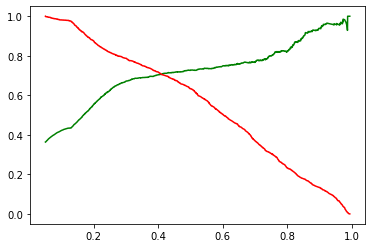

In [238]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [239]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Total Time Spent on Website,What is your current occupation_Unemployed,What is your current occupation_Working Professional
141,-0.762390,0,0
7418,-0.896825,0,0
6408,1.058933,0,0
3128,-1.092033,0,0
1490,1.626140,0,1


In [240]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,What is your current occupation_Unemployed,What is your current occupation_Working Professional
141,-0.762390,0,0
7418,-0.896825,0,0
6408,1.058933,0,0
3128,-1.092033,0,0
1490,1.626140,0,1


In [247]:
X_test_sm = sm.add_constant(X_test)

In [248]:
X_test_sm.shape

(2034, 4)

PREDICTIONS ON TEST SET

In [ ]:
y_test_pred = res.predict(X_test_sm)   

In [ ]:
y_test_pred[:10]

In [ ]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head
y_pred_1.head()

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

In [ ]:

y_pred_final.head()

Assigning Lead Score

In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [ ]:
# Let's see the head of y_pred_final
y_pred_final.head()

In [ ]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [ ]:
y_pred_final.head()

In [ ]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

In [ ]:
# check the precentage of final_predicted conversions on test data

865/float(865+177)

After running the model on the Test Data these are the figures we obtain:


Accuracy : 78.28%
    
Sensitivity : 78.69%
    
Specificity : 78.05%

    Conclusion:

While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
Accuracy, Sensitivity and Specificity values of test set are around 78%, 78% and 78% which are approximately closer to the respective values calculated using trained set.
Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 80%
Hence overall this model seems to be good.
Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :

Lead Origin_Lead Add Form
What is your current occupation_Working Professional
Total Time Spent on Website